# Ultra-High-Density Recording Visualizer

- Reads in an h5 file (either subtracted or original data)
- Filters the data between 400 and 5000 Hz (in vivo recordings)
- Plots the data in 8 X 8 "clusters" base one probe map data

## User Input
- Assumes this python notebook and the data file are in the same directory
- fs = sample rate (30000 Hz is Willow Default)
- if the h5 file is an original file, not subtracted, specify # channels

In [1]:
datafile = '20200324-third_subtracted.h5' 
fs = 30000
channels = 256
col_num = 3 # columns per shank
row_num = [21,20,21] # rows per column (# values should == # columns)

## Import Dependencies

In [2]:
import h5py
import numpy as np
import os
import matplotlib.pyplot as plt
from IPython.display import HTML
from scipy.signal import butter, sosfiltfilt, sosfreqz
import time

## Read in the Multichannel Data

In [3]:
f_data = h5py.File(datafile, 'r')
if 'subtracted' in str(f_data.keys()):
    x = f_data.get('x')
    ys = f_data.get('subtracted') # Data is already scaled from h5_subtractor.ipynb
elif 'channel_data' in str(f_data.keys()):    
    x = f_data.get('sample_index') # channel # (x)
    ys = f_data.get('channel_data') * 0.195 # data has to be scaled to microvolts (y)
    ys = ys[:, channels] # Remove unconnected channels (based on impedence data)


display (HTML("<hr><h4>Data consists of " + str(ys.shape[1]) + 
              " columns of data (channels, x) and " + str(ys.shape[0]) + " rows of data (measurements, y).<hr>"))

## Bandpass Filter (butterworth)

In [4]:
from scipy.signal import butter, sosfiltfilt, sosfreqz

def butter_bandpass(lowcut, highcut, fs, order=5):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        sos = butter(order, [low, high], analog=False, btype='band', output='sos')
        return sos

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
        sos = butter_bandpass(lowcut, highcut, fs, order=order)
        y = sosfiltfilt(sos, data)
        return y

lowcut = 450
highcut = 5000.0

y_filt = []
display (HTML("<br><hr color = 'gray'><h4>Analyzing channel: "))
for chan in range(0,ys.shape[1]):
    print(chan, end = ' ')
    order = 9
    sos = butter_bandpass(lowcut, highcut, fs, order=order)
    w, h = sosfreqz(sos, worN=2000)
    #ax[0].plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)
    #ax[0].plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],'--', label='sqrt(0.5)')
    #ax[0].set_xlabel('Frequency (Hz)')
    #ax[0].set_ylabel('Gain')
    #ax[0].legend(loc='best')
    y_filt.append(butter_bandpass_filter(ys[:,chan], lowcut, highcut, fs, order=order))
display(HTML('<hr>'))

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 

## Plot unfiltered traces from Shank #1 as a grid

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

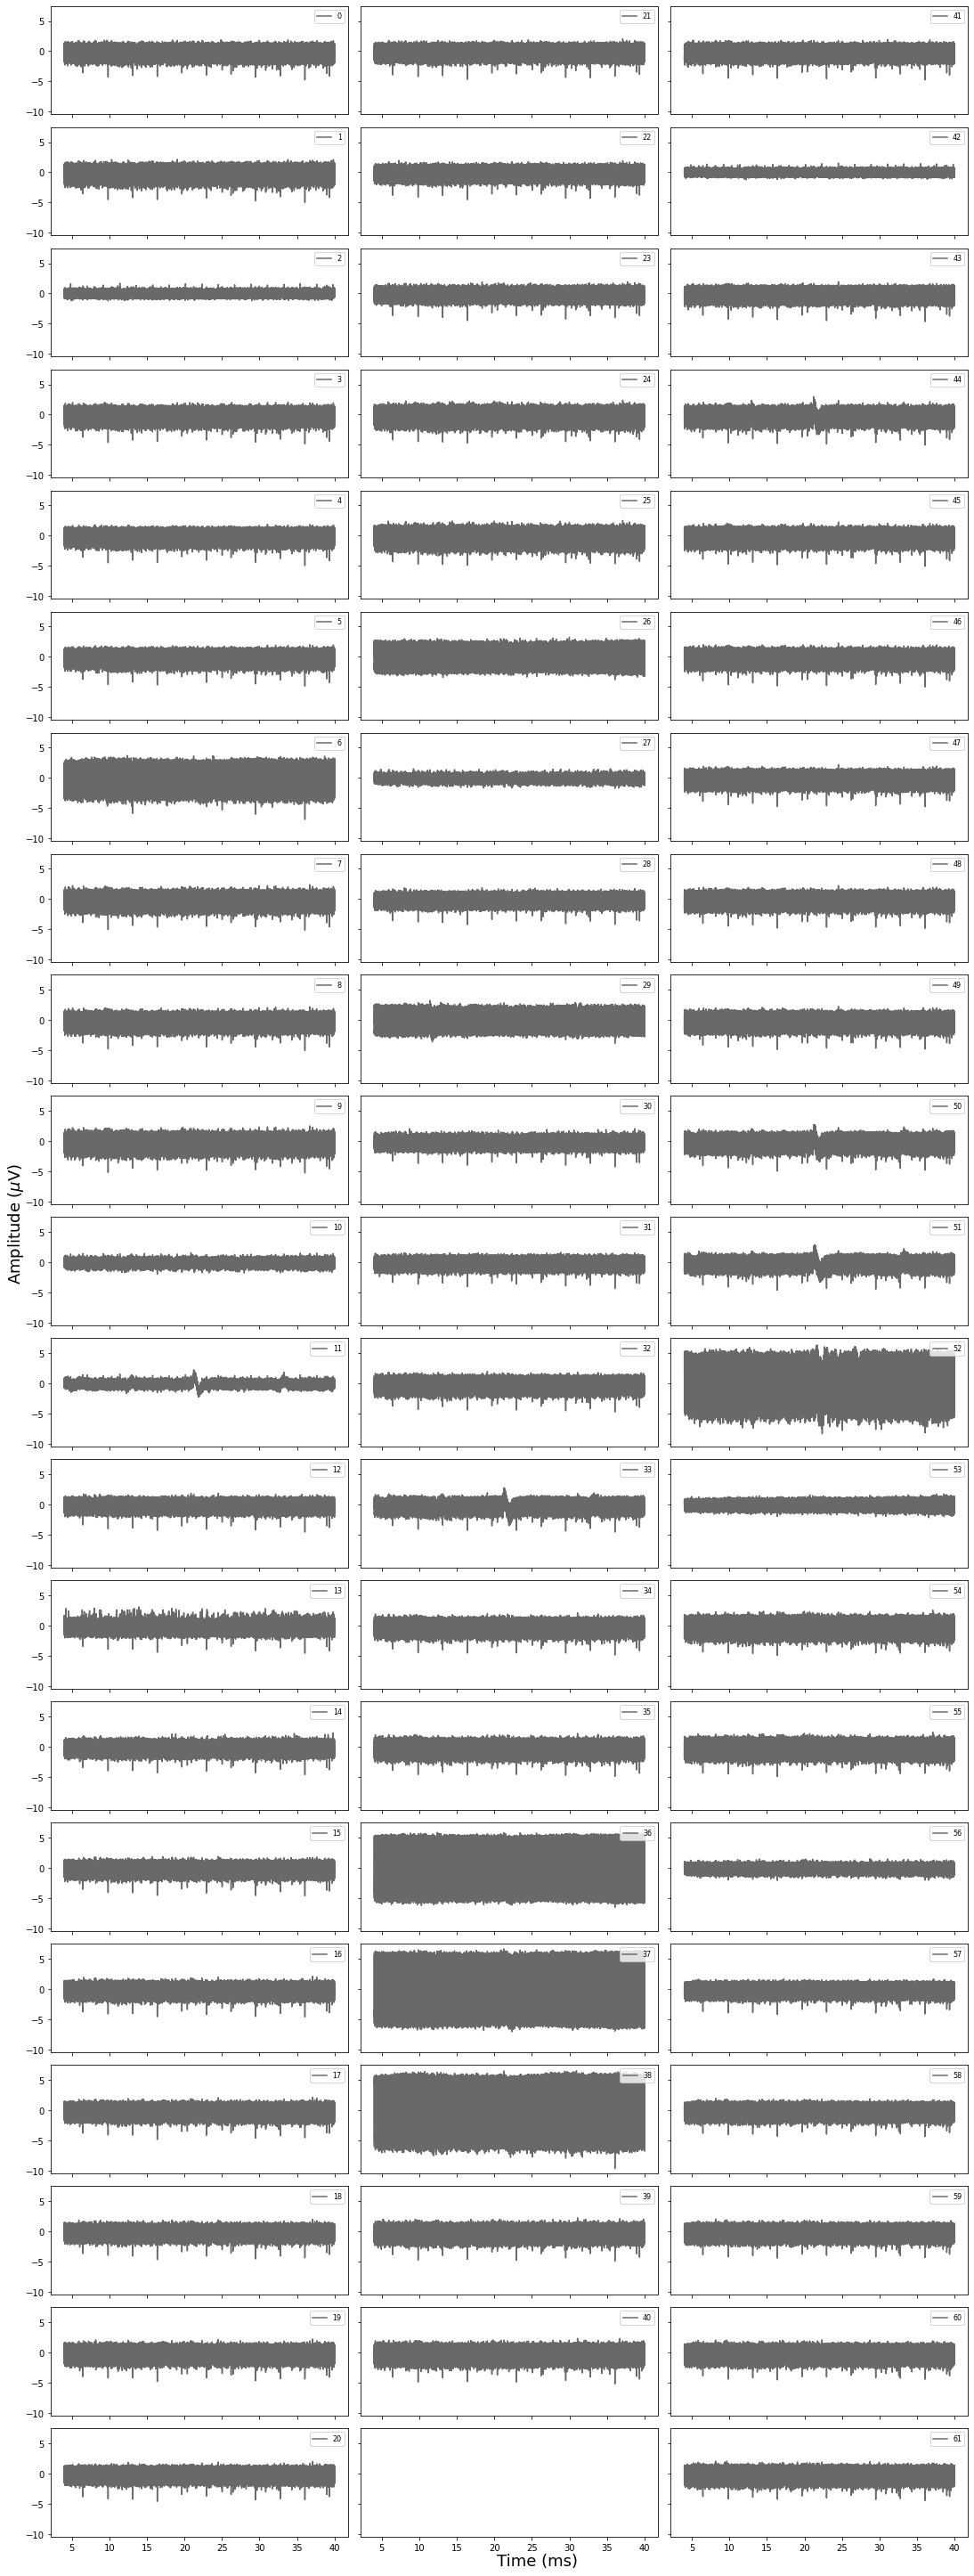

In [5]:
def grid_plot_unfiltered(chans, start, end, shank_num):
    display(HTML('<hr><h4>Plotting channel: '))
    fig, ax = plt.subplots (21,3, figsize =(15,40), sharex = True, sharey = True)
    j = 0
    ch_num = 0
    for j in range (0,col_num):
        i = 0
        for i in range (0,row_num[j]): 
            print(ch_num, end = ' ')
            ax[i][j].plot(x[start:end]/fs, ys[start:end,ch_num]/1000, color = 'dimgray', 
                            label=str(ch_num)) # Filtered Signal
            handles, labels = ax[i][j].get_legend_handles_labels()
            ax[i][j].legend(handles, labels, loc = 'upper right', fontsize = 8, shadow = False)
            #y_lims = ax[i][j].get_ylim()
            #ax[i][j].set_ylim(y_lims[0] - abs(y_lims[0]) * 0.1, y_lims[1] + abs(y_lims[1]) * 0.1)
            #ax[i][j].set_ylim(25, 40)
            #ax[i][j].set_title("Channel #" + str(chan) + ', Z = ' + str(round(imp[chan],2))  + r' M$\Omega$', fontsize = 20)
            #ax[i][j].tick_params (labelsize = 15)
            plt.tight_layout()
            ch_num = ch_num + 1
    fig.text(0.0, 0.5, r'Amplitude ($\mu$V)', ha='center', rotation='vertical', fontsize = 18)
    fig.text(0.5, 0.0, 'Time (ms)', va='center',  fontsize = 18)
    plt.savefig ('shank' + str(shank_num) + '_grid_unfiltered.png')
    display(HTML('<hr>'))
    
start =120000 # A 30s window works well on a good laptop 
end = 1215000 
chans = list(np.arange(0,col_num + sum(row_num)))
grid_plot_unfiltered(chans, start, end, 1)

## Plot all filtered traces from Shank1 as a grid 

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 

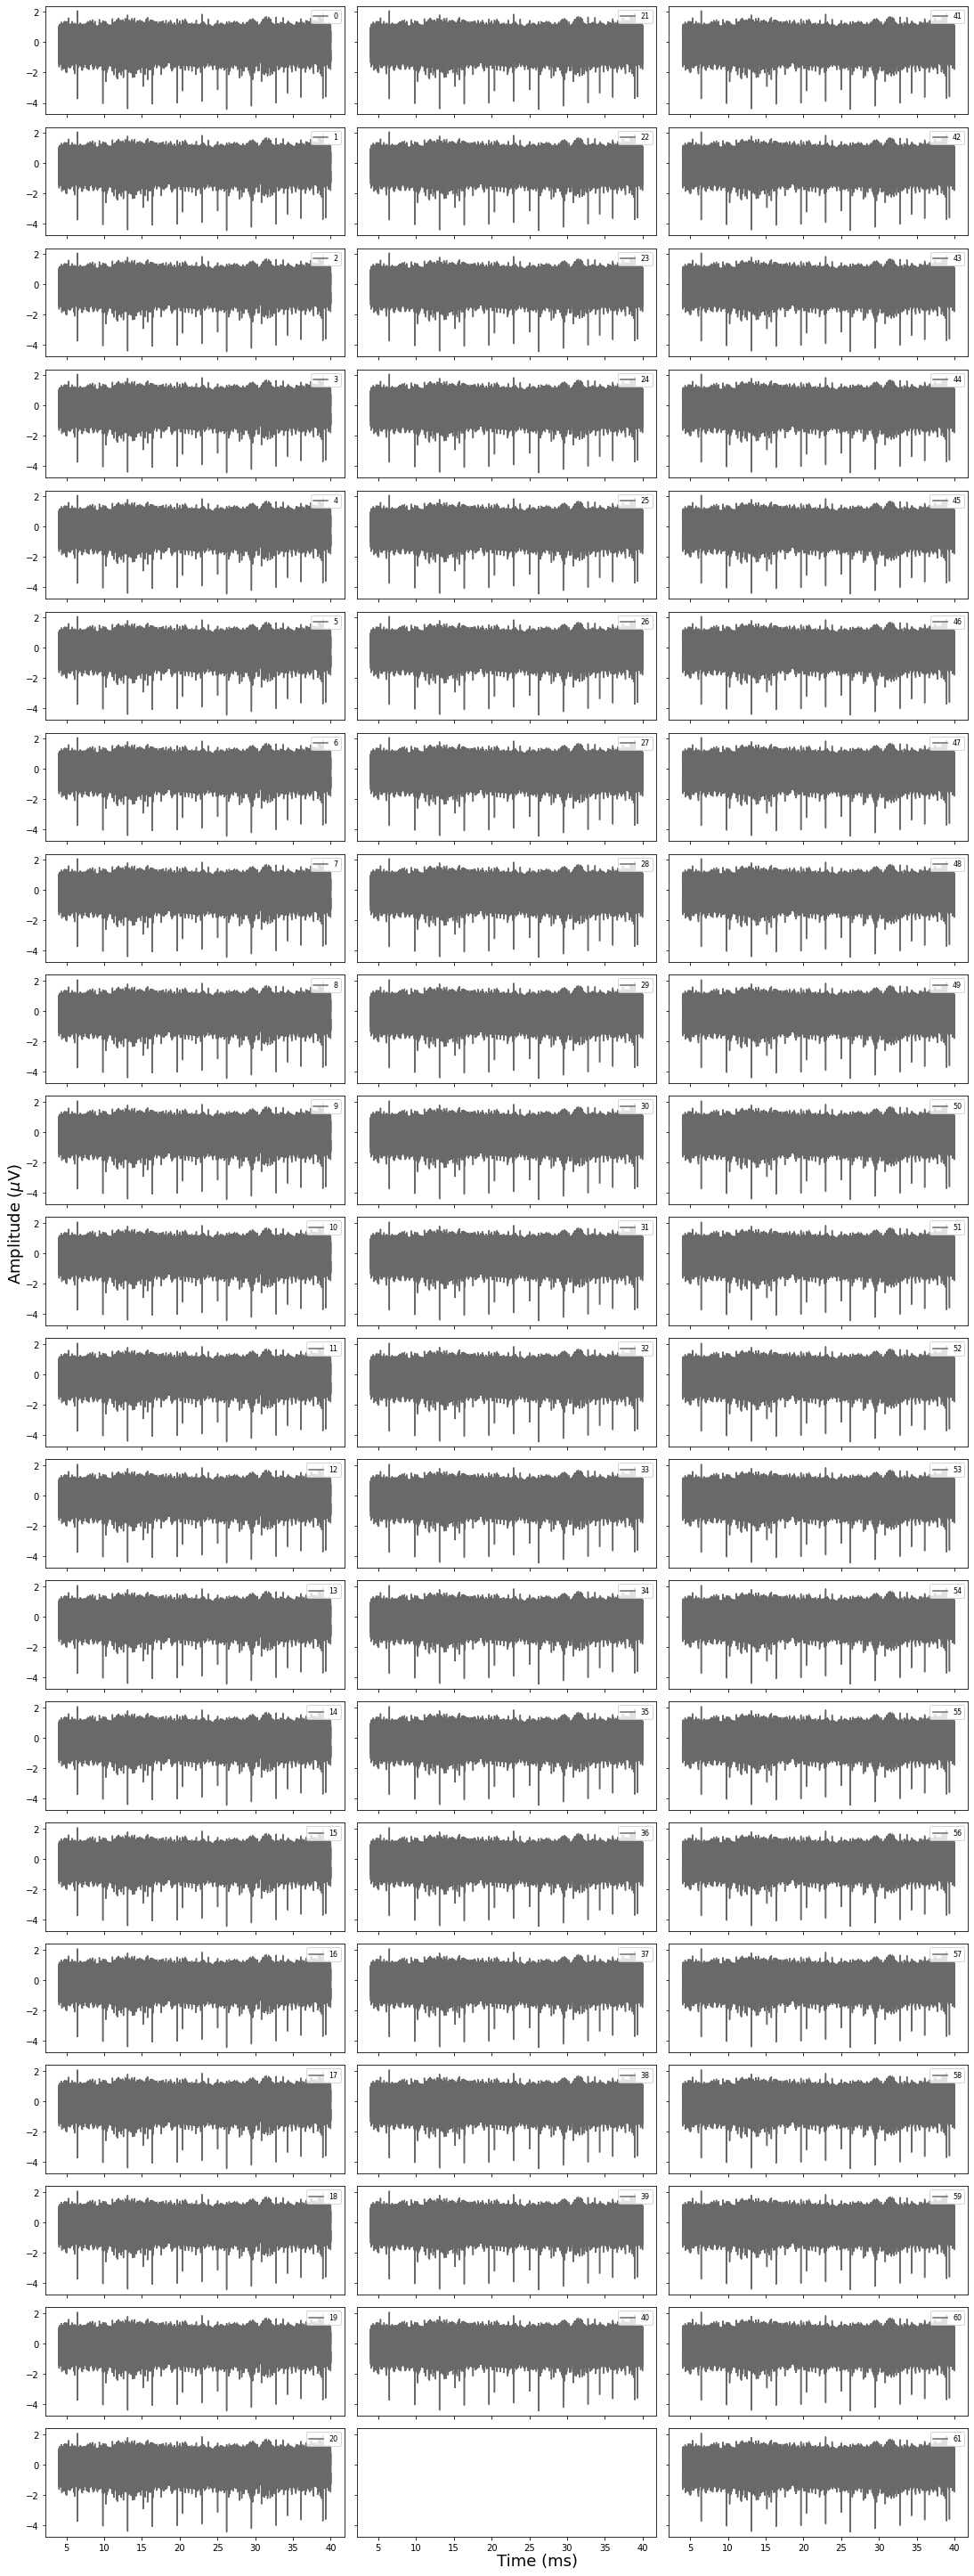

In [9]:
def grid_plot_filtered(chans, start, end, shank_num):
    display(HTML('<hr><h4>Plotting channel: '))
    fig, ax = plt.subplots (21,3, figsize =(15,40), sharex = True, sharey = True)
    j = 0
    ch_num = 0
    for j in range (0,col_num):
        i = 0
        for i in range (0,row_num[j]):
            print(ch_num, end = ' ')
            ax[i][j].plot(x[start:end]/fs, y_filt[chan] [start:end]/1000, color = 'dimgray', 
                        label=str(ch_num)) # Filtered Signal
            handles, labels = ax[i][j].get_legend_handles_labels()
            ax[i][j].legend(handles, labels, loc = 'upper right', fontsize = 8, shadow = False)
            #y_lims = ax[i][j].get_ylim()
            #ax[i][j].set_ylim(y_lims[0] - abs(y_lims[0]) * 0.1, y_lims[1] + abs(y_lims[1]) * 0.1)
            #ax[i][j].set_ylim(25, 40)
            #ax[i][j].set_title("Channel #" + str(chan) + ', Z = ' + str(round(imp[chan],2))  + r' M$\Omega$', fontsize = 20)
            #ax[i][j].set_ylabel('Amplitude (mV) \n', fontsize = 18)
            #ax[i][j].tick_params (labelsize = 15)
            ch_num = ch_num + 1
    plt.tight_layout()
    fig.text(0.0, 0.5, r'Amplitude ($\mu$V)', ha='center', rotation='vertical', fontsize = 18)
    fig.text(0.5, 0.0, 'Time (ms)', va='center',  fontsize = 18)
    plt.savefig ('shank' + str(shank_num) + '_grid_filtered.png')
    display(HTML('<hr>'))
    
start =120000 # A 30s window works well on a good laptop 
end = 1215000 
chans = list(np.arange(0,col_num + sum(row_num)))
grid_plot_filtered(chans, start, end, 1)

## Plot unfiltered data from Shank2 as grid

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

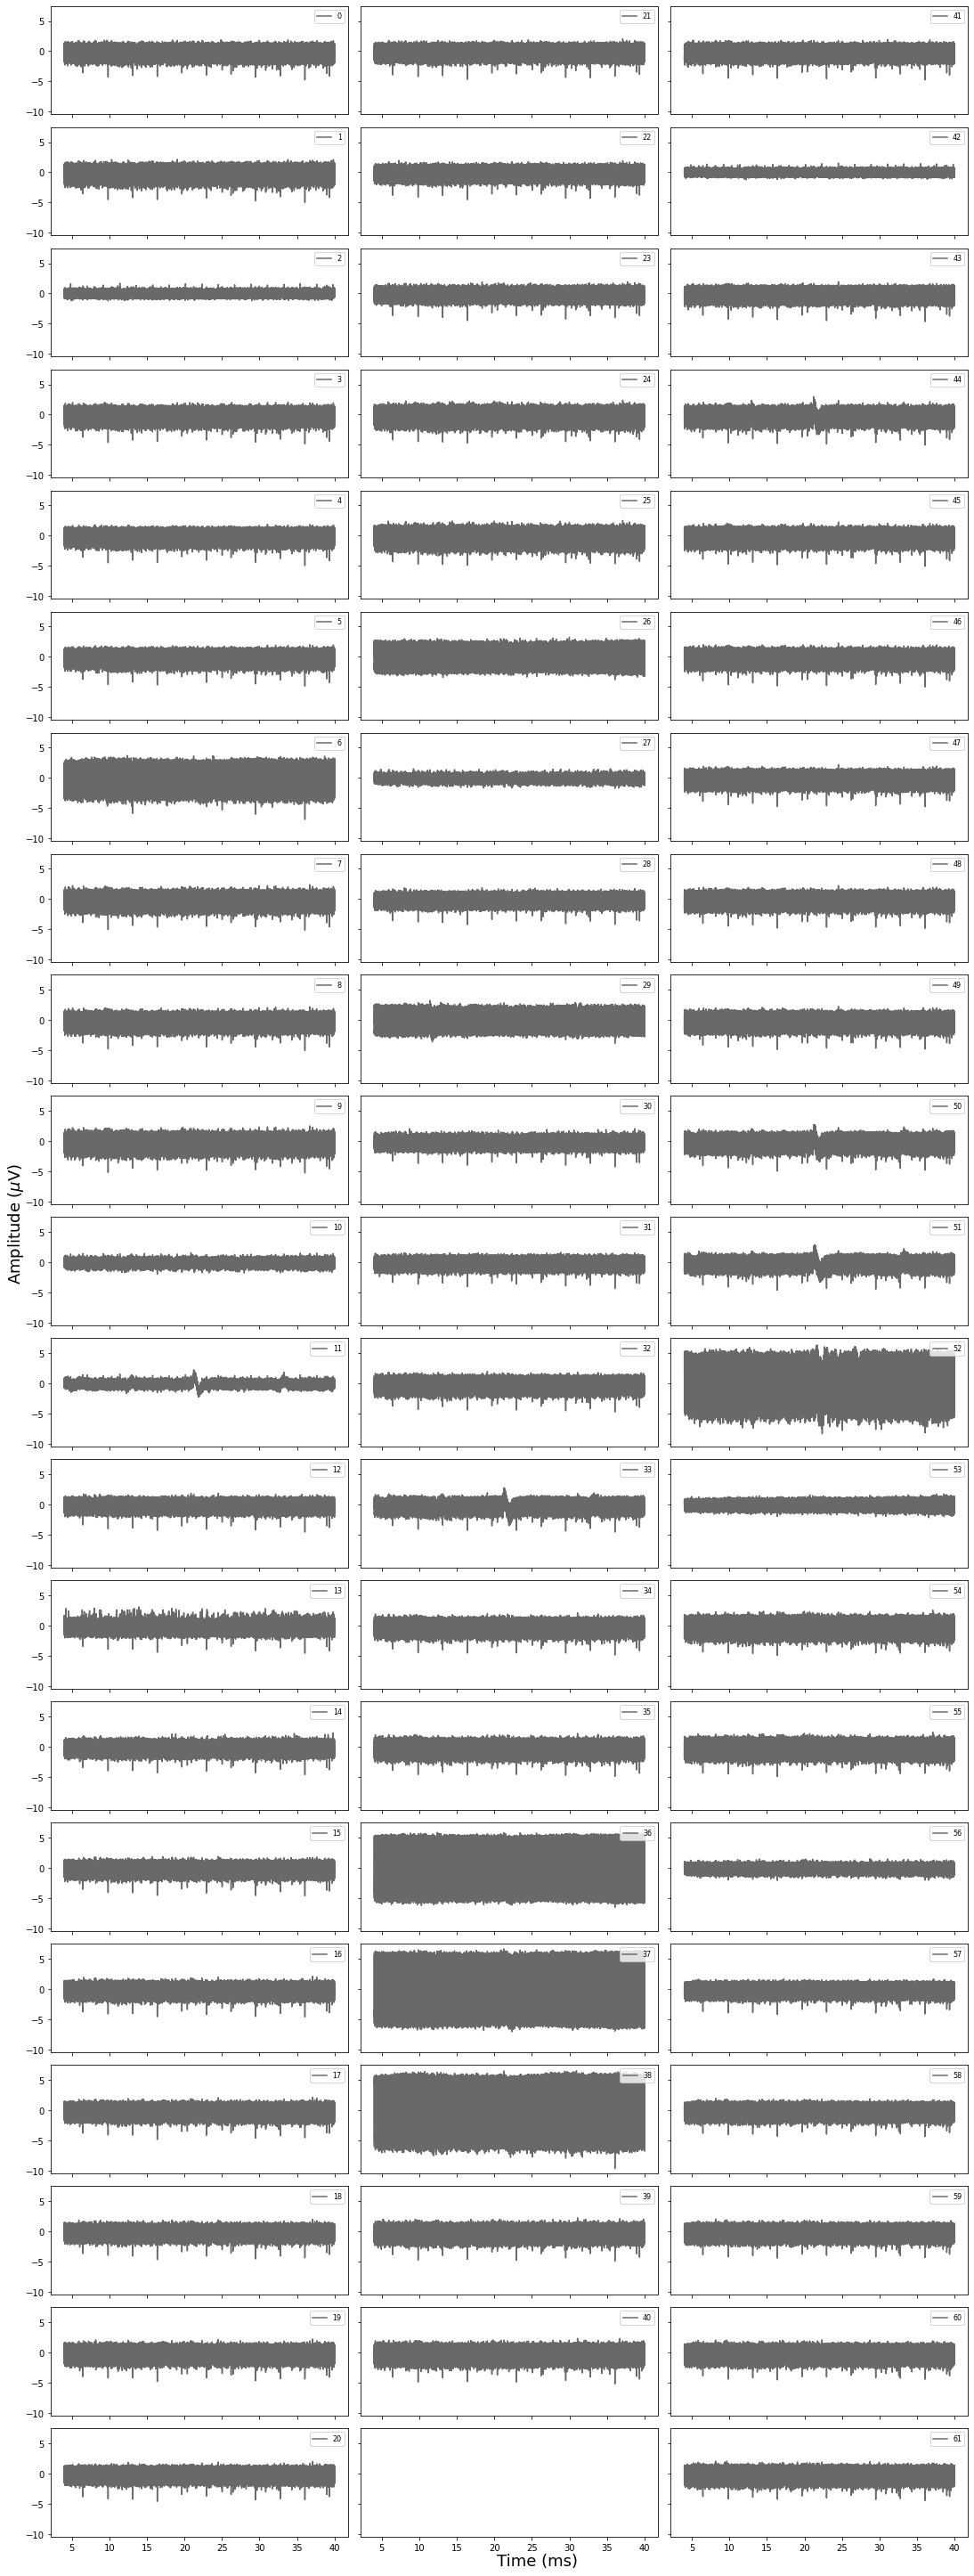

In [7]:
start =120000 # A 30s window works well on a good laptop 
end = 1215000 
chans = list(np.arange(0,col_num + sum(row_num)))
grid_plot_unfiltered(chans, start, end, 2)

## Plot filtered data from Shank2 as grid

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 

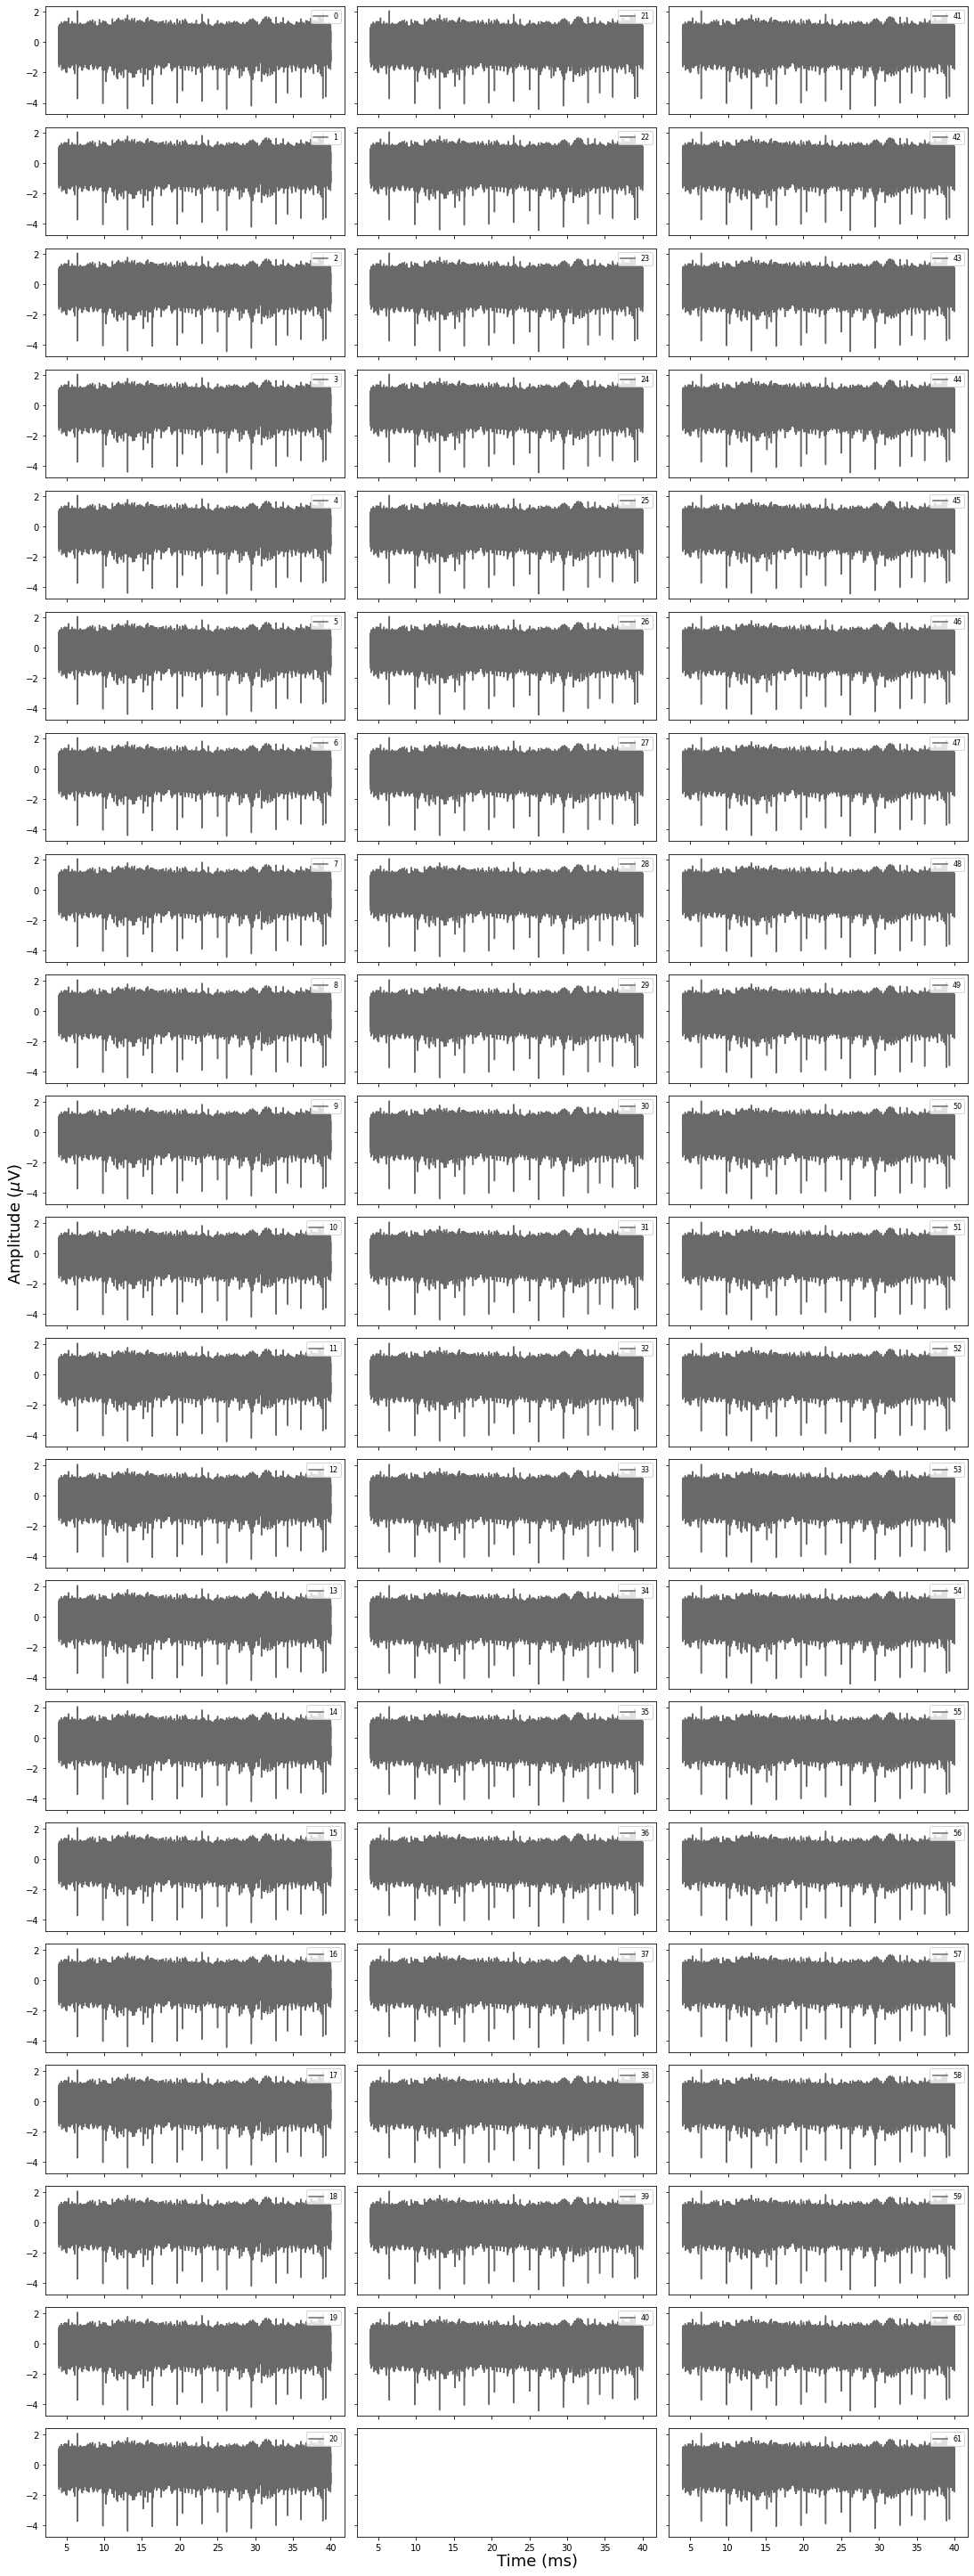

In [10]:
start =120000 # A 30s window works well on a good laptop 
end = 1215000 
chans = list(np.arange(0,col_num + sum(row_num)))
grid_plot_filtered(chans, start, end, 2)

## Plot unfiltered data from Shank3 as grid

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

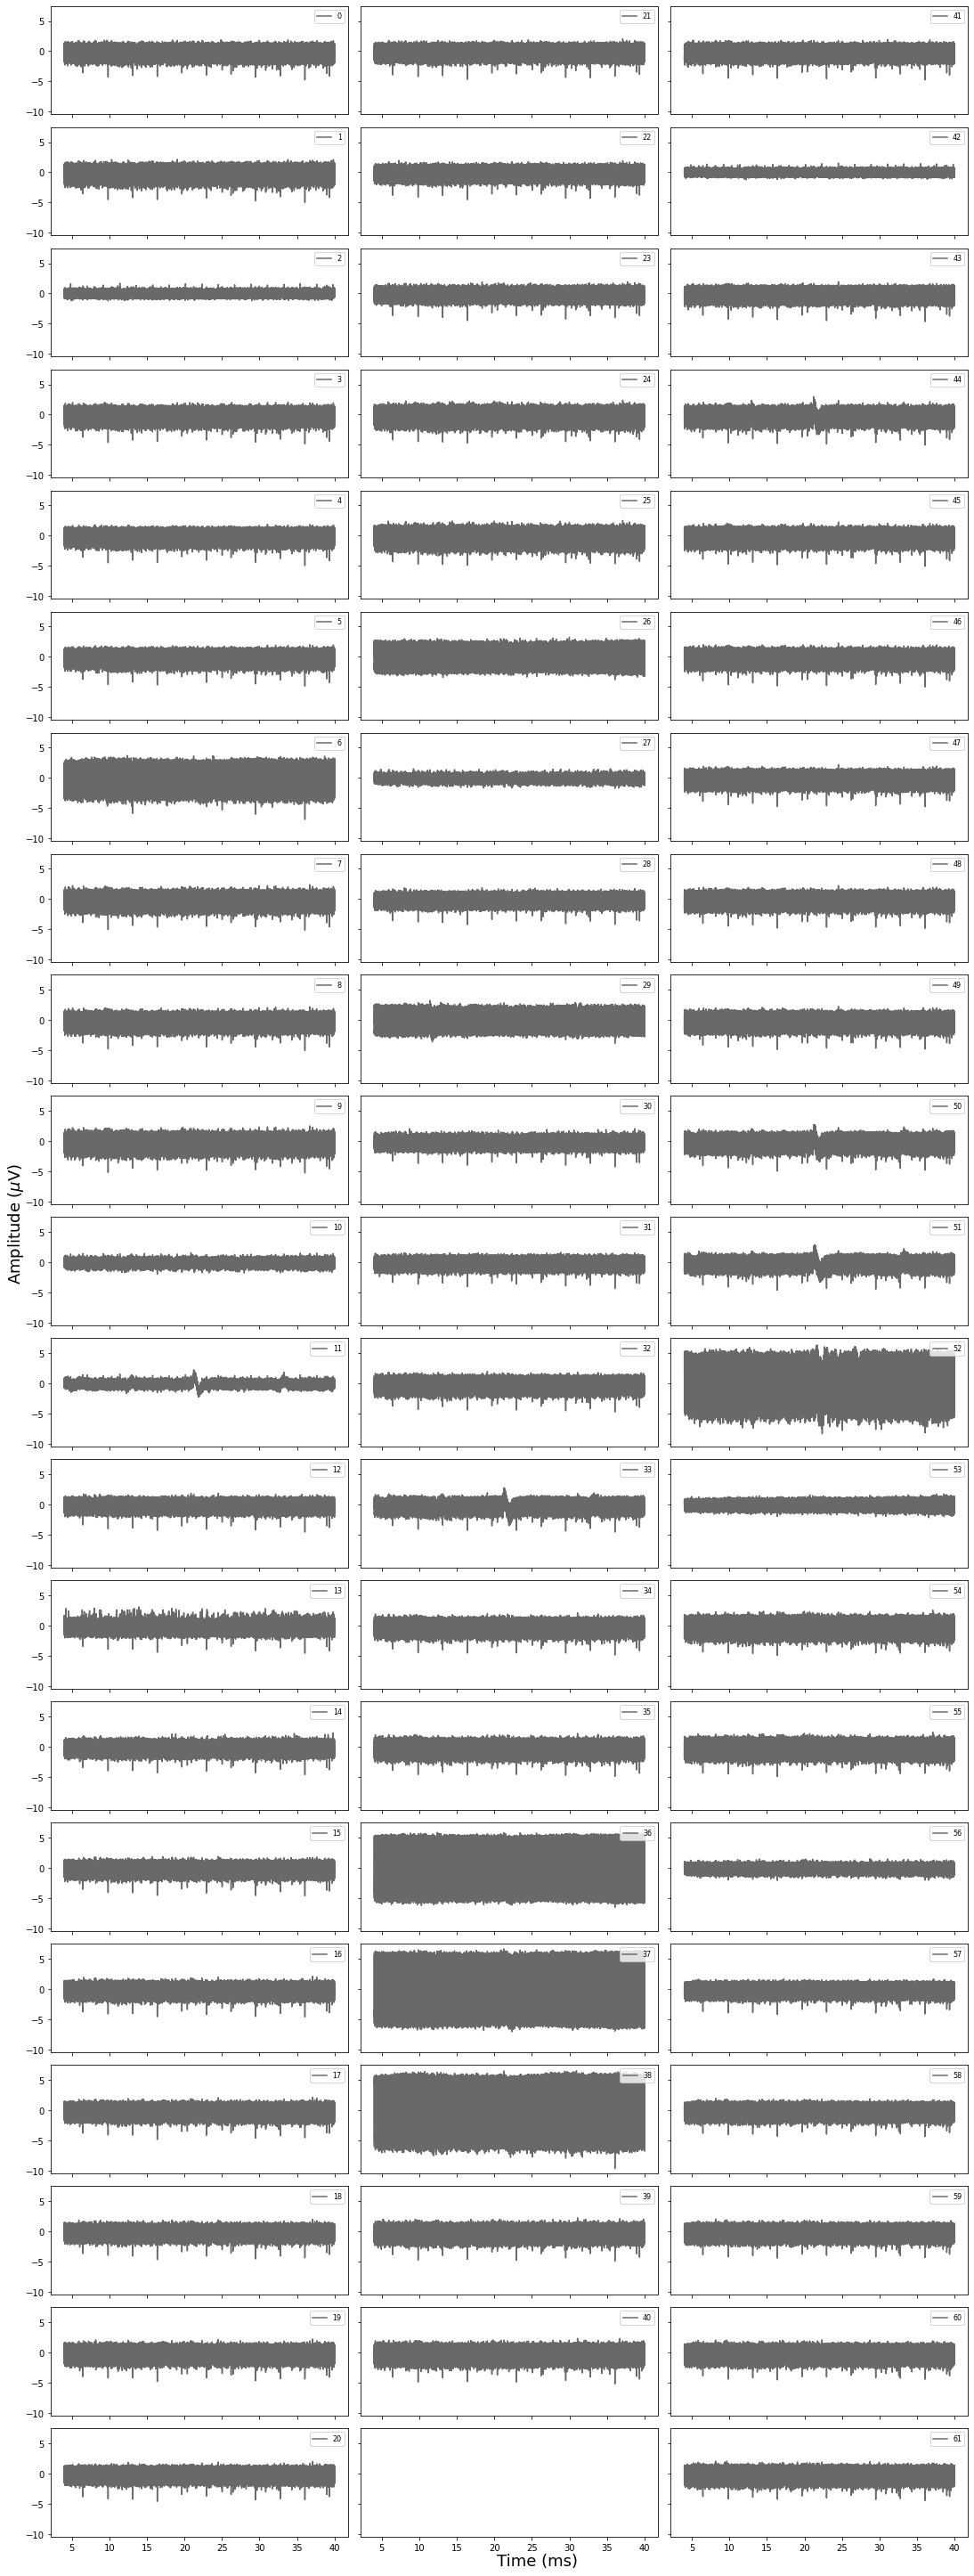

In [11]:
start =120000 # A 30s window works well on a good laptop 
end = 1215000 
chans = list(np.arange(0,col_num + sum(row_num)))
grid_plot_unfiltered(chans, start, end, 3)

## Plot filtered data from Shank3 as grid

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 

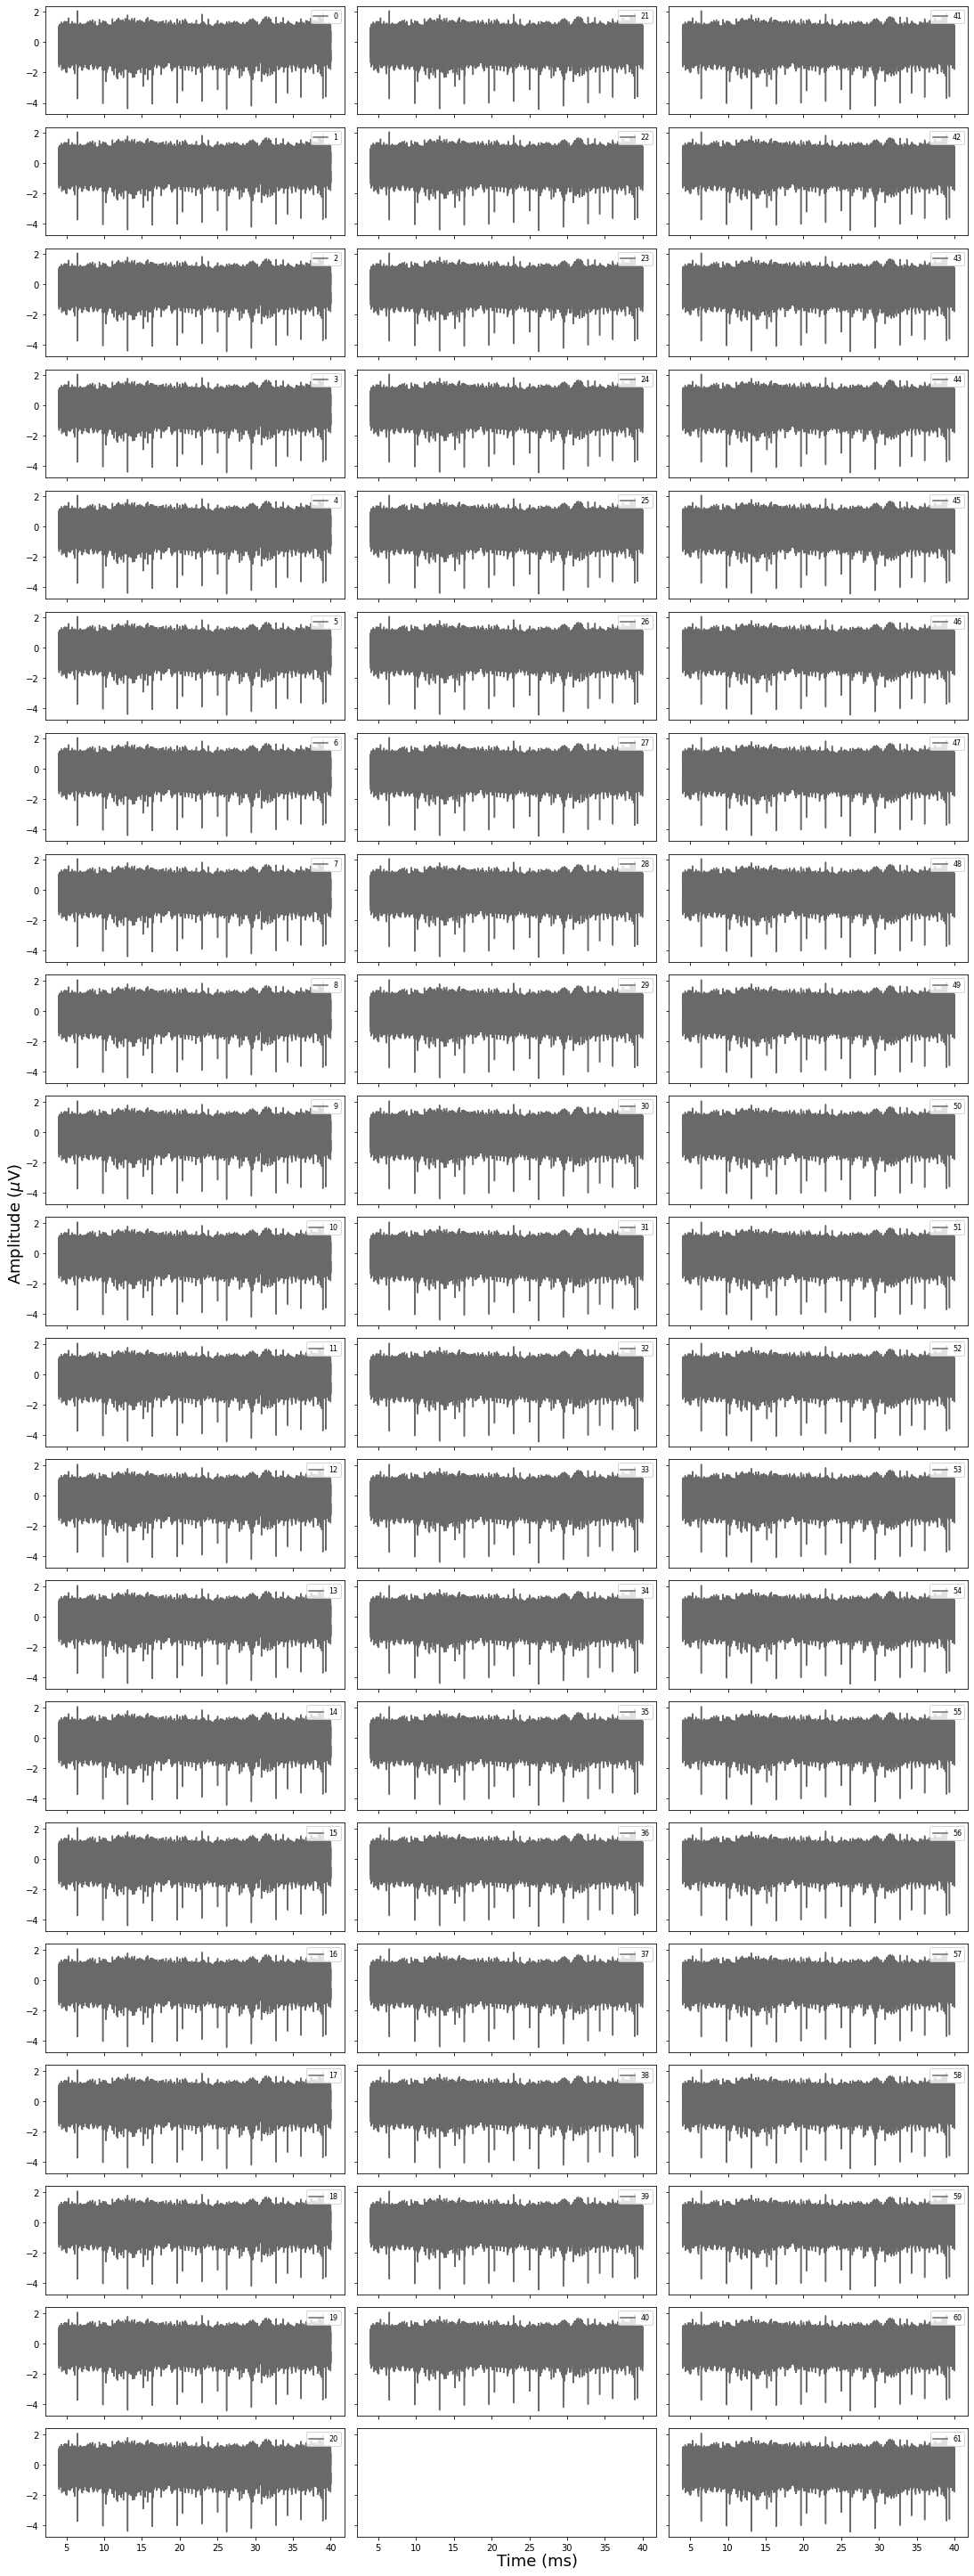

In [14]:
start =120000 # A 30s window works well on a good laptop 
end = 1215000 
chans = list(np.arange(0,col_num + sum(row_num)))
grid_plot_filtered(chans, start, end, 3)

## Plot unfiltered data from Shank4 as grid

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

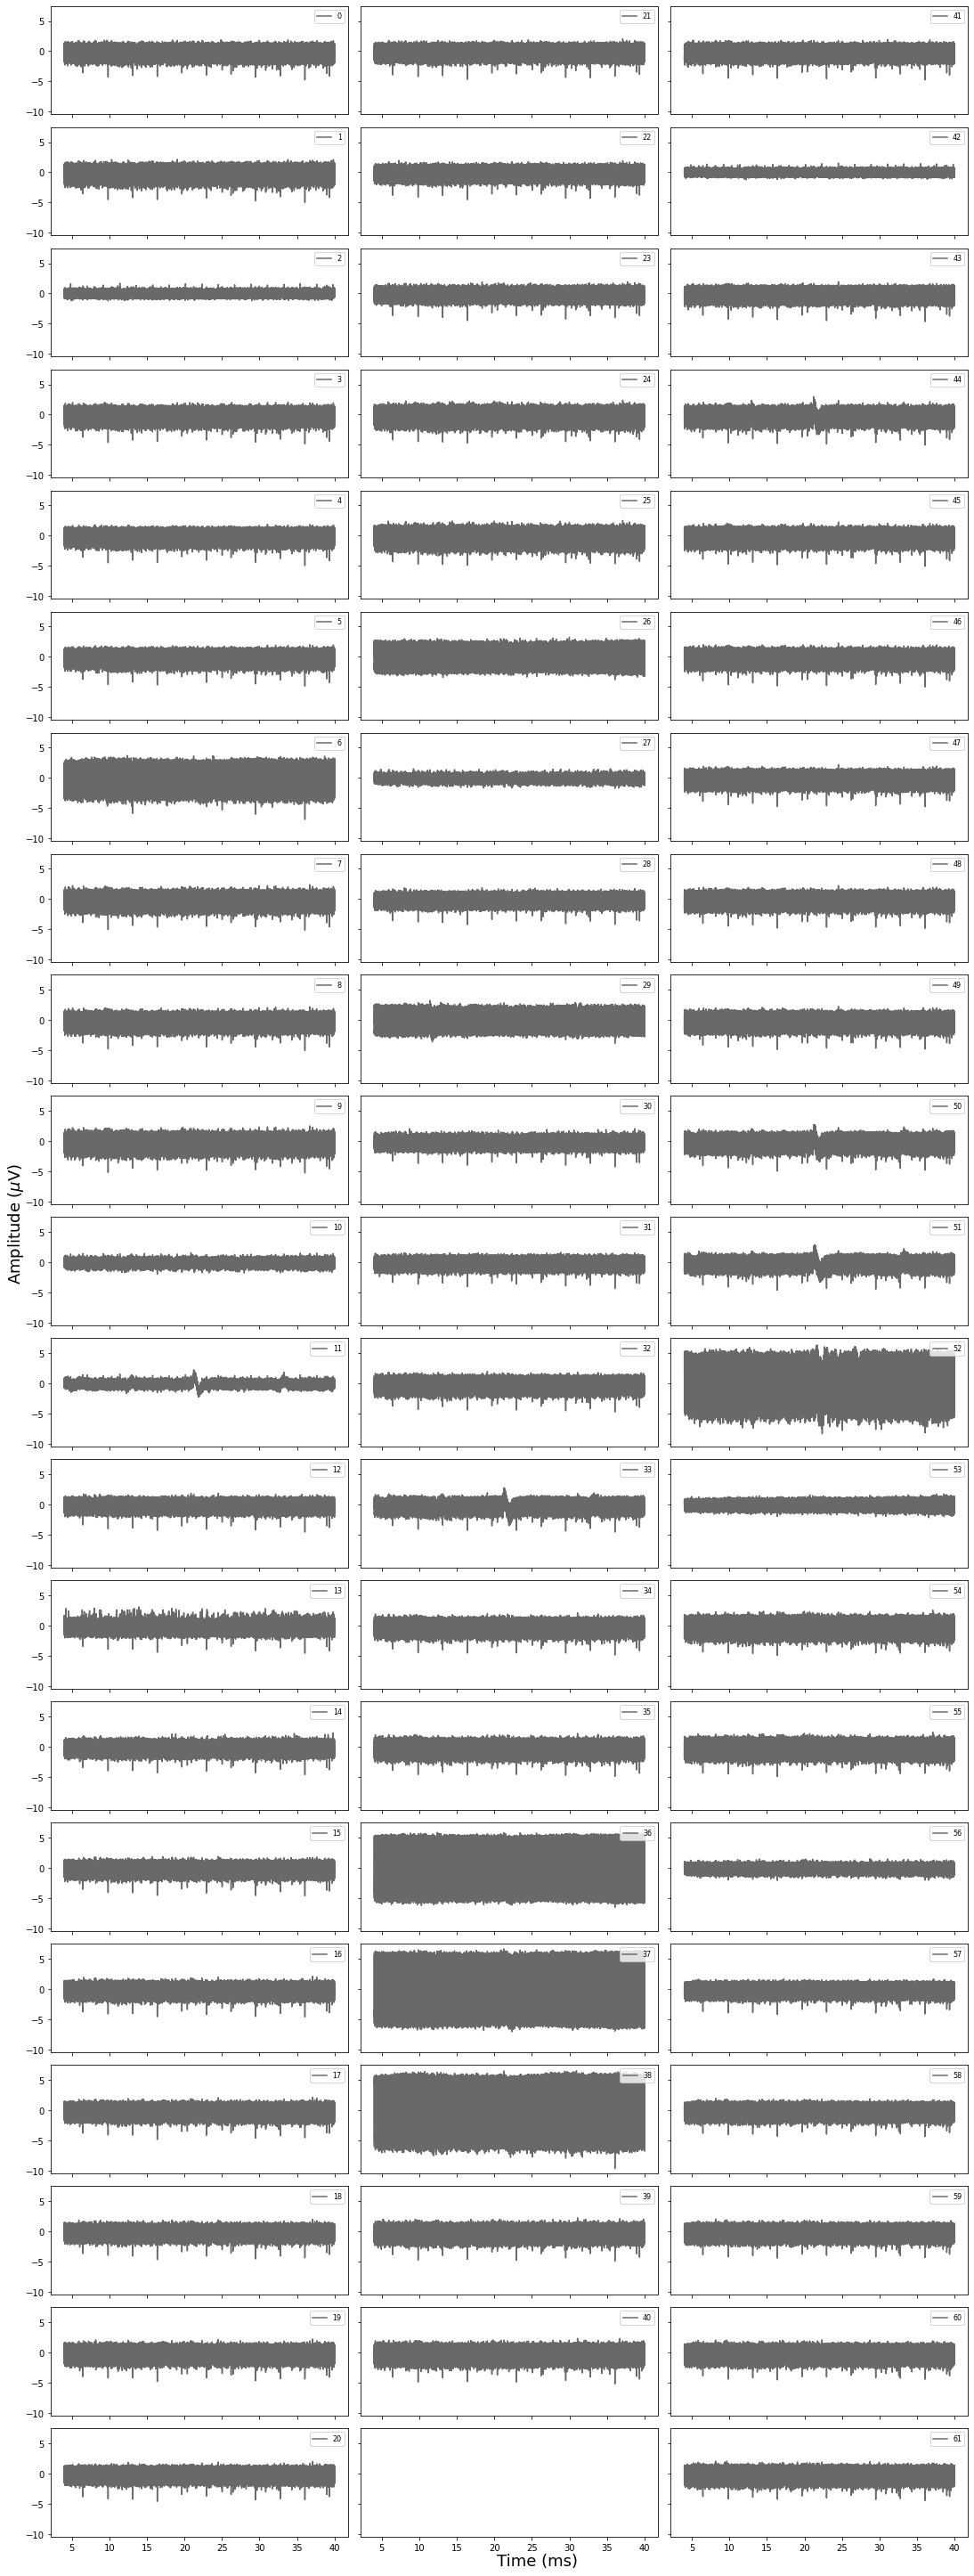

In [13]:
start =120000 # A 30s window works well on a good laptop 
end = 1215000 
chans = list(np.arange(0,col_num + sum(row_num)))
grid_plot_unfiltered(chans, start, end, 4)

## Plot filtered data from Shank4 as grid

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 

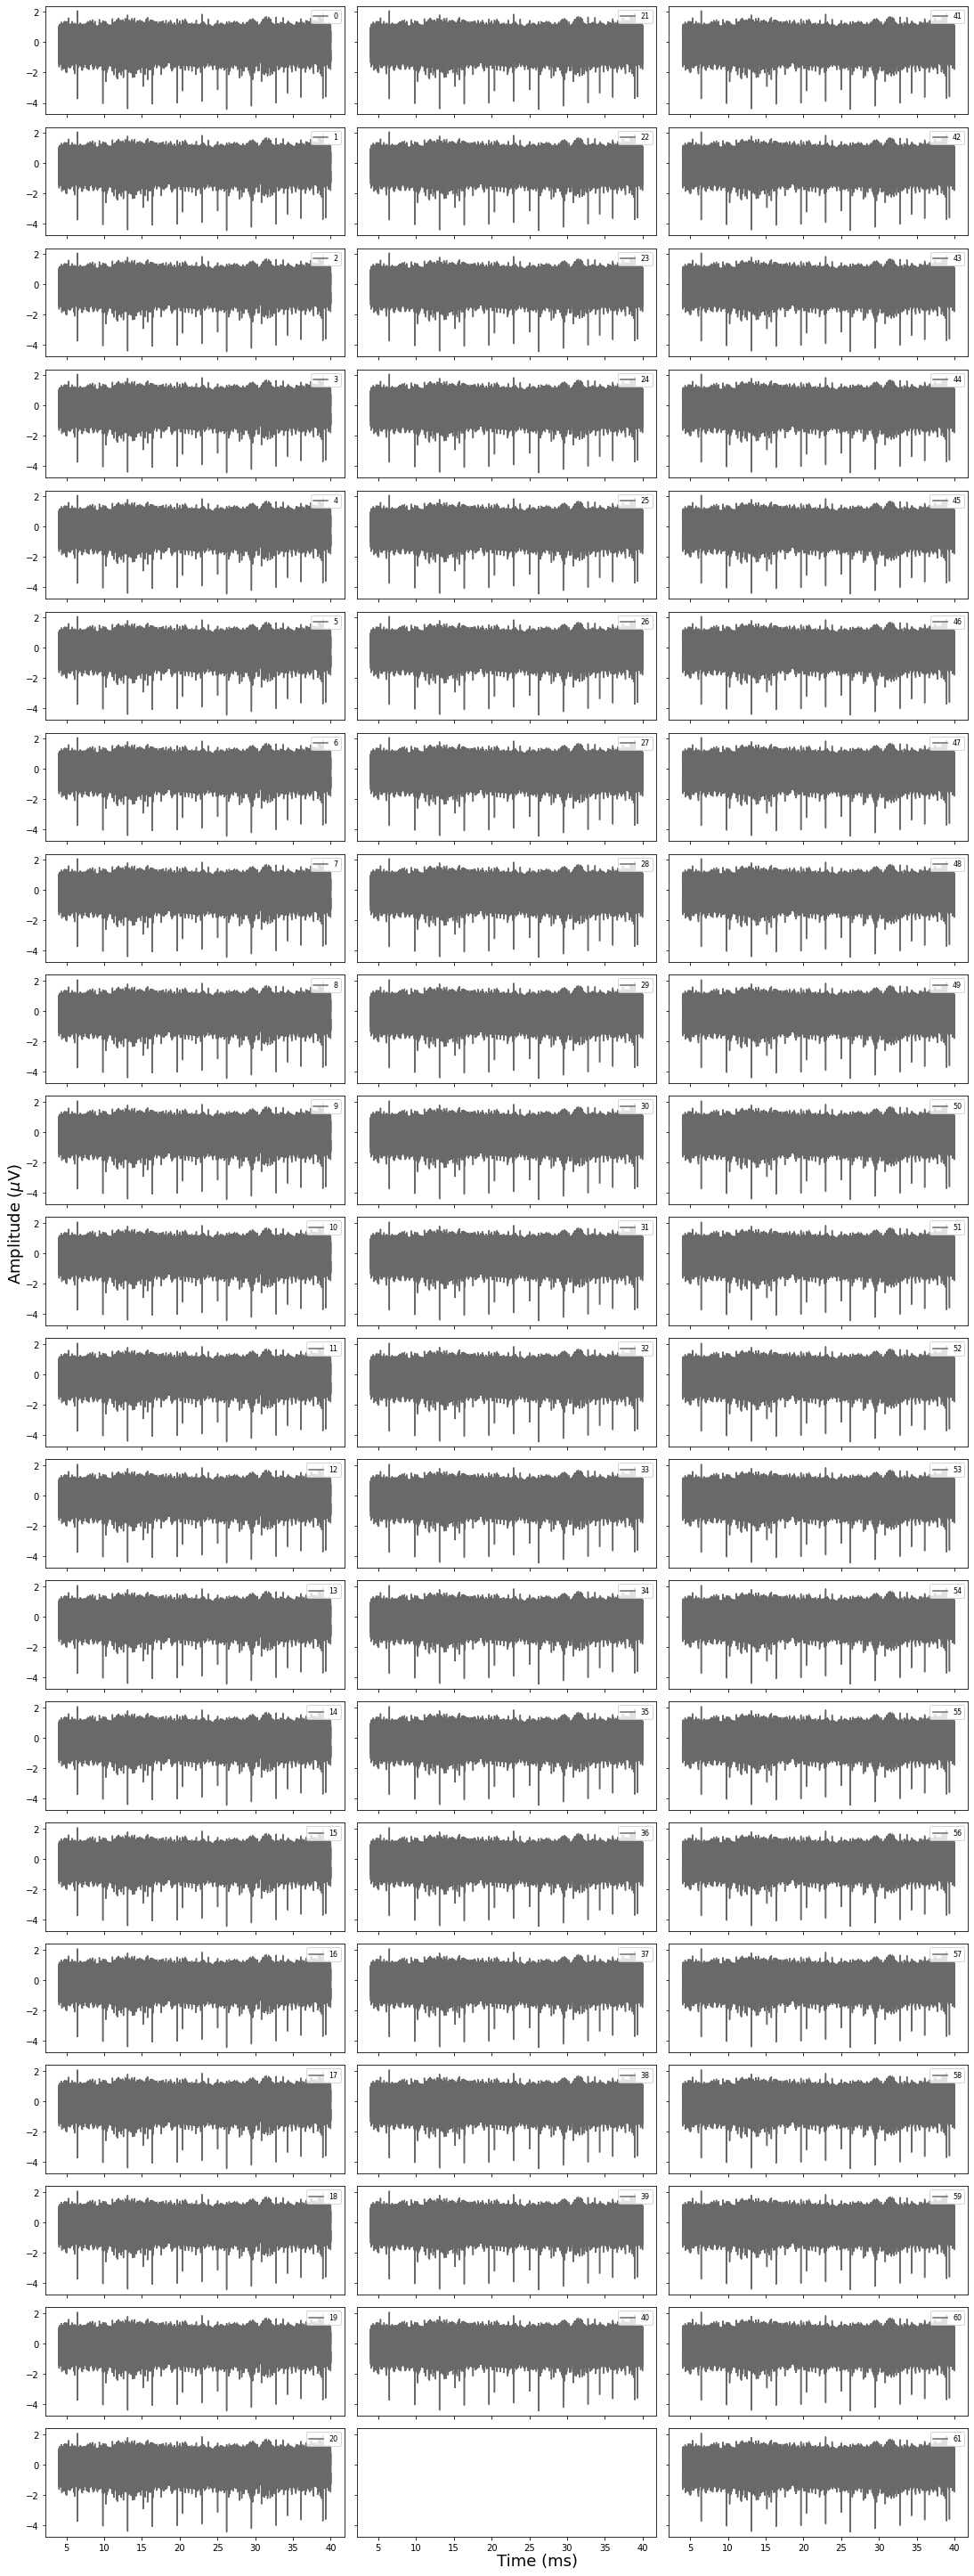

In [15]:
start =120000 # A 30s window works well on a good laptop 
end = 1215000 
chans = list(np.arange(0,col_num + sum(row_num)))
grid_plot_filtered(chans, start, end, 4)